In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def cspline(x, y, xx):
    '''
    Вычисление естественного кубического сплайна
    x - массив координат узлов
    y - массив значений интерполируемой функции
    xx - массив значений аргумента, для которых надо вычислить значения
    сплайна
    '''
    n = len(x) - 1
    A = np.eye(n + 1, dtype=float)
    h = np.diff(x)
    diag = np.array(list(map(lambda i: [1 / h[i], 2 * (1 / h[i] + 1 / h[i + 1]), 1 / h[i + 1]], range(n - 1))),
                    dtype=float)
    diag = np.reshape(diag, (diag.size,))

    mask = np.abs(np.add.outer(np.arange(n + 1), -np.arange(n + 1))) < 2
    mask[0], mask[-1] = np.full((len(mask),), False), np.full((len(mask),), False)
    print(mask)
    A[mask] = diag
    # # print(h)
    # b = np.column_stack([np.array(
    #               [6 * (y[0] - y[1]) / h[0] ** 2, 
    #               *list(map(lambda i: 3 * ((y[i - 1] - y[i - 2]) / h[i - 2] ** 2 + y[i] - y[i - 1] / h[i - 1] ** 2), range(2, n))),
    #               6 * (y[n - 1] - y[n - 2] ) / h[n - 2] ** 2 ],
    #              )])
    # s = np.linalg.solve(A, b) 
    # 
    # def ermit(i, x):
    #     return y[i - 1] * ()
    
    return A

In [56]:
x = [1, 7, 9, 12, 27]
print(cspline(x, [2, 4, 7, 12, 32], 0))

[[False False False False False]
 [ True  True  True False False]
 [False  True  True  True False]
 [False False  True  True  True]
 [False False False False False]]
[[1.         0.         0.         0.         0.        ]
 [0.16666667 1.33333333 0.5        0.         0.        ]
 [0.         0.5        1.66666667 0.33333333 0.        ]
 [0.         0.         0.33333333 0.8        0.06666667]
 [0.         0.         0.         0.         1.        ]]


## Проверка

[2.1, 0.8999999999999999, 1.8000000000000003, 1.5999999999999996]


ValueError: x and y must have same first dimension, but have shapes (101,) and (1,)

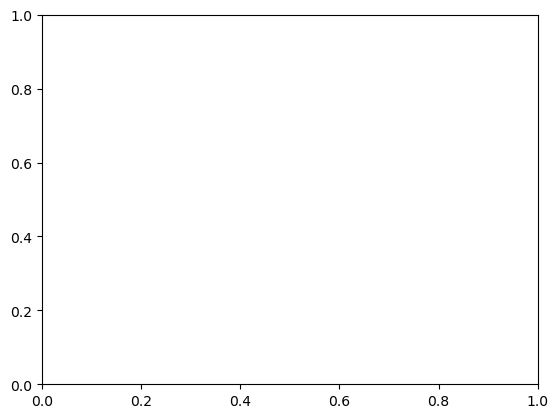

In [6]:
x = np.array([0.1, 2.2, 3.1, 4.9, 6.5])
y = np.sin(x)
xx = np.linspace(0.1, 6.5, 101)
yy = cspline(x, y, xx)
plt.plot(x, y, 'o', xx, np.sin(xx), '--', xx, yy)
plt.grid()
plt.show

In [ ]:
def cspline(x, y, xx):
  h = np.diff(x);
  n = len(x) - 1
  b = np.zeros(n + 1)
  A = np.zeros((n + 1, n + 1))
  np.fill_diagonal(A,   np.concatenate(([2], 2 * (h[:-1] ** -1 + h[1:] ** -1), [2])))
  np.fill_diagonal(A[:, 1:], np.concatenate(([1], h[1:]  ** -1 )))
  np.fill_diagonal(A[1:], np.concatenate((h[:-1]  ** -1, [1])))
  b[0] =3 * (y[1] - y[0]) / h[0];
  b[1:-1] = 3 * ((y[1:-1] - y[:-2]) / h[:-1] ** 2 + ((y[2:] - y[1:-1]) / h[1:] ** 2));
  b[-1] = 3 * (y[n] - y[n-1]) / h[n-1]
  s = np.linalg.solve(A, b)
  i = np.searchsorted(x, xx)
  i[0] = 1
  # print(i)
  return y[i - 1] * ((xx - x[i])**2 * (2 * (xx - x[i - 1])+ h[i - 1]) / h[i - 1] ** 3)\
  + s[i - 1] * ((xx - x[i])**2 * ((xx - x[i - 1])) / h[i - 1] ** 2) + y[i]*((xx - x[i - 1])**2 * (2 * ( x[i] - xx)+ h[i - 1]) / h[i - 1] ** 3)\
  + s[i] * ((xx - x[i - 1])**2 * (xx - x[i]))/h[i - 1] ** 2
